# Questão 1

João e Maria estão jogando RPG, um jogo de imaginação em que as regras do mundo são ditadas por jogadas de dados.

Em uma campanha, Maria encontra três itens que permitem aumentar os pontos de vida do jogador. Cada item vai aumentar o número obtido pela soma da jogada de diferentes dados, podendo ser dados de 4, 6, 8, 10 ou 12 faces. As regras para o cálculo do número de pontos de vida para cada item são:

 - Soma da jogada de 1 dado de 12 faces mais 1 dado de 10 faces. Se o resultado for menor que 7, adicionar 1 dado de 4 faces;
 - Soma da jogada de 2 dados de 6 faces e 2 dados de 4 faces. Se o resultado for menor que 7, adicionar 1 dado de 4 faces;
 - Soma da jogada de 6 dados de 4 faces. Se o resultado for menor que 7, adicionar 1 dado de 12 faces

João não sabe qual item escolher, então Maria decide calcular quais seriam os valores esperados e dispersão desses valores para cada um dos itens.

### Instruções

Escreva um programa que simule a jogada de 10 mil dados e calcule a média e desvio-padrão para cadas uma das opções.

Construa um gráfico de barras para cada opção com o número de vezes que cada face foi lançada.

In [147]:
# Nome: Felipe Barroso de Castro
# RA: 2311292
# Curso: Engenharia de Software

import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, poisson
import statistics
from random import randint

Item 1:
Hp Médio: 12.3108
Desvio Padrão: 4.016242442881156



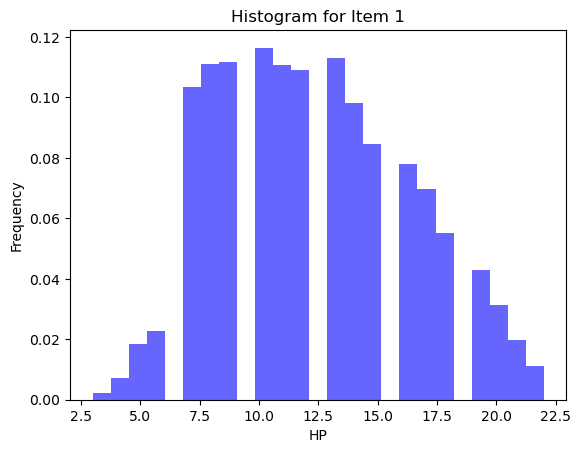

Item 2:
Hp Médio: 12.074
Desvio Padrão: 2.7574125552771416



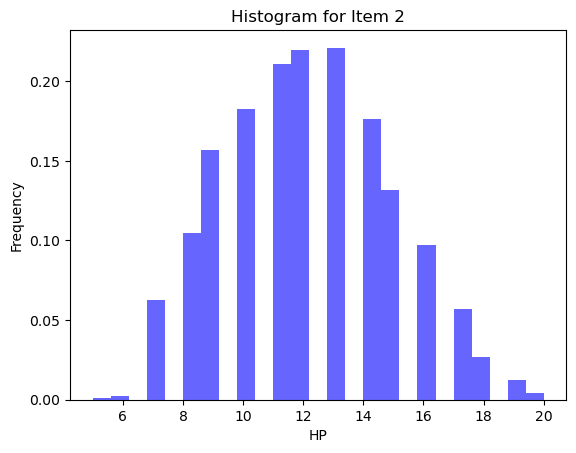

Item 3:
Hp Médio: 14.9801
Desvio Padrão: 2.7502552590623295



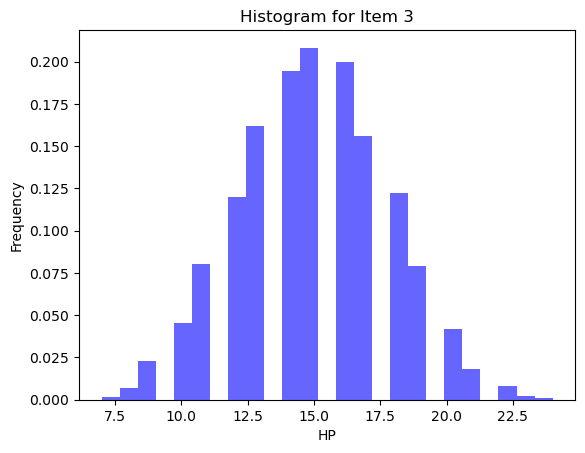

In [88]:
def roll(num_faces, num_rolls):
    return sum(random.randint(1, num_faces) for _ in range(num_rolls))

def heal_options(item):
    if item == 1:
        resultado = roll(12, 1) + roll(10, 1)
        if resultado < 7:
            resultado += roll(4, 1)
    elif item == 2:
        resultado = roll(6, 2) + roll(4, 2)
        if resultado < 7:
            resultado += roll(4, 1)
    elif item == 3:
        resultado = roll(4, 6)
        if resultado < 7:
            resultado += roll(12, 1)
    return resultado

def stats(item, n_simulations=10000):
    valores_hp = []

    for _ in range(n_simulations):
        hp = heal_options(item)
        valores_hp.append(hp)

    media = sum(valores_hp) / n_simulations
    variance = (sum(x ** 2 for x in valores_hp) / n_simulations) - (media ** 2)
    desvio = variance ** 0.5

    return media, desvio, valores_hp

for i in range(1, 4):
    media, desvio, valores_hp = stats(i)
    print(f"Item {i}:")
    print(f"Hp Médio: {media}")
    print(f"Desvio Padrão: {desvio}")
    print()

    plt.figure()
    plt.hist(valores_hp, bins=25, density=True, alpha=0.6, color='blue')
    plt.title(f"Histogram for Item {i}")
    plt.xlabel("HP")
    plt.ylabel("Frequency")
    plt.show()

# Questão 2

Em um município do Brasil, sabe-se que  a idade dos habitantes não é conhecida, mas sabe-se que as seguintes faixas de idade seguem a seguinte distribuição de probabilidade:
 - 25% da população tem entre 0 e 12 anos
 - 50% da população tem entre 13 e 35 anos
 - 15% da população tem entre 35 e 55 anos
 - 10% da população tem mais de 56 anos

Sabendo que o município tem 50 mil habitantes, simule a distribuição de idades desse município. Obtenha os valores das idades de cada faixa e adicione-os a uma lista.


Para entender melhor a distribuição de probabilidade, obtenha um Histograma das idades obtidas no passo anterior, ou seja, um gráfico de barras em que cada barra reflete o número de vezes que o valor aparece no conjunto de dados.

Calcule a média e desvio padrão desse conjunto de dados.

Por fim, obtenha 100 amostras de 100 pessoas desse município e calcule a média de cada amostra. Obtenha um Histograma para o conjunto de médias obtido.

População que tem entre 0 e 12 anos: 12500
População que tem entre 13 e 35 anos: 25000
População que tem entre 35 e 55 anos: 7500
População que tem mais de 56: 5000

Média de idade: 35 anos
Desvio padrão de idade: 25.57 anos


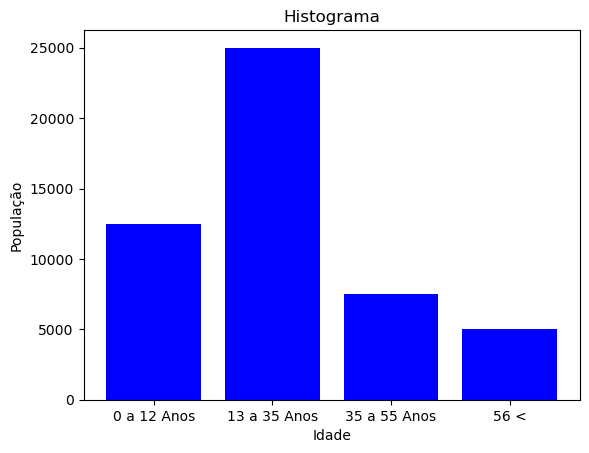

In [108]:
pop_0a12 = 0.25
pop_13a35 = 0.5
pop_35a55 = 0.15
pop_56maior = 0.1

pop_total = 50000
quantidade_0a12 = pop_0a12*pop_total
quantidade_13a35 = pop_13a35*pop_total
quantidade_35a55 = pop_35a55*pop_total
quantidade_56maior = pop_56maior*pop_total

print(f'População que tem entre 0 e 12 anos:{quantidade_0a12: .0f}')
print(f'População que tem entre 13 e 35 anos:{quantidade_13a35: .0f}')
print(f'População que tem entre 35 e 55 anos:{quantidade_35a55: .0f}')
print(f'População que tem mais de 56:{quantidade_56maior: .0f}')

# Organização
dados = [quantidade_0a12, quantidade_13a35, quantidade_35a55, quantidade_56maior]
labels = ['0 a 12 Anos', '13 a 35 Anos', '35 a 55 Anos', '56 <']

# Histograma
plt.bar(labels, dados, color='b')

# Adicionar título e rótulos aos eixos
plt.title('Histograma')
plt.xlabel('Idade')
plt.ylabel('População')

# Idades médias para cada faixa etária
idades_medias = [6, 24, 45, 65]
media_idade = statistics.mean(idades_medias)
desvio_padrao_idade = statistics.stdev(idades_medias)

print(f'\nMédia de idade: {media_idade:.0f} anos')
print(f'Desvio padrão de idade: {desvio_padrao_idade:.2f} anos')

# Questão 3

Em uma indústria farmacêutica aproximadamente 1% dos pacientes tratados com um novo remédio apresentam reação adversa. Considerando uma amostra de 2000 pacientes.
a) Qual a distribuição de probabilidades utilizadas para o cálculo de probabilidades para este teste. Justifique a sua resposta.
b) Calcule a probabilidade de 0 a 10 reações adversas (faça este cálculo pela distribuição Binomial e de Poisson e plote histogramas para cada um dos cálculos). Há diferença entre os valores encontrados? Em caso afirmativo, porque haveria esta diferença?
c) Baseado nos cálculos anteriores, o remédio é seguro?

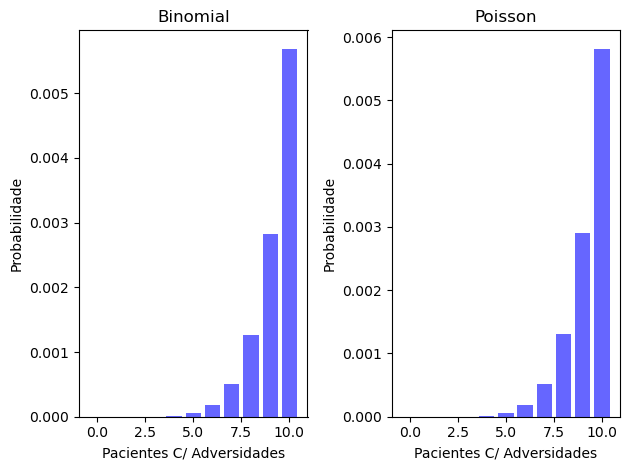

In [170]:
# A) Neste caso, a melhor forma de calcularmos as probabilidades é por meio binomial, pois só
# podem ter dois resultados, Fracasso(Reação Adversa) e Sucesso(Sem Reação Adversa). Além de 
# termos nossa população fixa.

n = 2000
p = 0.01
lamb = n*p
k_values = list(range(11))

prob_binom = binom.pmf(k_values, n, p)
prob_poisson = poisson.pmf(k_values, lamb)

plt.subplot(1, 2, 1)
plt.bar(k_values, prob_binom, color='b' , alpha = 0.6)
plt.title('Binomial')
plt.xlabel('Pacientes C/ Adversidades')
plt.ylabel('Probabilidade')

plt.subplot(1, 2, 2)
plt.bar(k_values, prob_poisson, color='b', alpha =0.6)
plt.title('Poisson')
plt.xlabel('Pacientes C/ Adversidades')
plt.ylabel('Probabilidade')

plt.tight_layout()

# C) Existem pequenas variações nos valores, pois na forma binomial neste caso temos maior
# precisão, e por meio probabilistico de poisson nós temos pequenas variações nos valores
# pois poisson não é adequado para realizar essa questão.

# D) O remedio não é seguro, pois a quantidade de pessoas com reações adversas é muito alto.